In [147]:
import pandas as pd
import numpy as np


In [148]:
df_results = pd.read_csv('C:/Users/werel/Documents/Python/Matura/srednie_wyniki_egzaminu_maturalnego_2.csv', sep=';').drop(['nazwa_zmiennej', 
                                                                        'flaga', 'typ_informacji_z_jednostka_miary'], axis=1)
df_results.shape

(1008, 6)

In [149]:
df_results

,rodzaj_egzaminu,poziom_egzaminu,przedmiot,plec,rok,wartosc
0,pisemny,podstawowy,język polski,kobiety,2015,"67,3"
1,pisemny,podstawowy,język białoruski,kobiety,2015,"77,4"
2,pisemny,podstawowy,język litewski,kobiety,2015,"83,5"
3,pisemny,podstawowy,język ukraiński,kobiety,2015,"77,4"
4,pisemny,podstawowy,matematyka,kobiety,2015,"52,7"
...,...,...,...,...,...,...
1003,ustny,nie dotyczy,język niemiecki,ogółem,2022,0
1004,ustny,nie dotyczy,język francuski,ogółem,2022,0
1005,ustny,nie dotyczy,język rosyjski,ogółem,2022,0
1006,ustny,nie dotyczy,język hiszpański,ogółem,2022,0


In [150]:
df_results.dtypes

rodzaj_egzaminu    object
poziom_egzaminu    object
przedmiot          object
plec               object
rok                 int64
wartosc            object
dtype: object

In [151]:
df_results.columns

Index(['rodzaj_egzaminu', 'poziom_egzaminu', 'przedmiot', 'plec', 'rok',
       'wartosc'],
      dtype='object')

In [152]:
df_results['wartosc'] = df_results['wartosc'].astype(str)
df_results['wartosc'] = df_results['wartosc'].apply(lambda x: float(x.replace(',','.')))
df_results.dtypes

rodzaj_egzaminu     object
poziom_egzaminu     object
przedmiot           object
plec                object
rok                  int64
wartosc            float64
dtype: object

In [153]:
df_students = pd.read_csv('C:/Users/werel/Documents/Python/Matura/liczba_osob_ktore_przystapily_lub_zdaly_egzamin_maturalny.csv', sep=';').drop(['nazwa_zmiennej',
                                                                       'typ_informacji_z_jednostka_miary', 'kraj', 'Unnamed: 8', 'Unnamed: 9'], axis=1)
df_students.shape

(884, 5)

In [154]:
df_students

,wojewodztwo,status_zdajacych,plec,rok,wartosc
0,Ogółem,przystąpiło,mężczyźni,2010,160988
1,Ogółem,przystąpiło,kobiety,2010,205635
2,Ogółem,przystąpiło,mężczyźni,2011,150984
3,Ogółem,przystąpiło,kobiety,2011,192840
4,Ogółem,przystąpiło,mężczyźni,2012,145321
...,...,...,...,...,...
879,Zachodniopomorskie,zdało,kobiety,2020,3728
880,Zachodniopomorskie,zdało,mężczyźni,2021,3351
881,Zachodniopomorskie,zdało,kobiety,2021,3953
882,Zachodniopomorskie,zdało,mężczyźni,2022,3403


In [155]:
df_students.dtypes

wojewodztwo         object
status_zdajacych    object
plec                object
rok                  int64
wartosc              int64
dtype: object

In [156]:
df_passed = df_students[df_students['status_zdajacych'] == 'zdało']
df_participated = df_students[df_students['status_zdajacych'] == 'przystąpiło']

In [157]:
new_list = []


for index, row in df_participated.iterrows():
    passed = df_passed[ (df_passed['wojewodztwo'] == row['wojewodztwo'])  & (df_passed['rok'] == row['rok']) & (df_passed['plec'] == row['plec']) ]['wartosc'].values
    ratio = passed[0] / row['wartosc']
    new_dir = {'wojewodztwo': row['wojewodztwo'], 'plec': row['plec'], 'rok': row['rok'], 'ratio': ratio}
    new_list.append(new_dir)
    
df_region_with_ratio = pd.DataFrame(new_list)
df_region_with_ratio

,wojewodztwo,plec,rok,ratio
0,Ogółem,mężczyźni,2010,0.805321
1,Ogółem,kobiety,2010,0.822452
2,Ogółem,mężczyźni,2011,0.752073
3,Ogółem,kobiety,2011,0.756990
4,Ogółem,mężczyźni,2012,0.799141
...,...,...,...,...
437,Zachodniopomorskie,kobiety,2020,0.711722
438,Zachodniopomorskie,mężczyźni,2021,0.702663
439,Zachodniopomorskie,kobiety,2021,0.696932
440,Zachodniopomorskie,mężczyźni,2022,0.766441


In [158]:
df_results = df_results[df_results['rodzaj_egzaminu'] == 'pisemny']
df_results

,rodzaj_egzaminu,poziom_egzaminu,przedmiot,plec,rok,wartosc
0,pisemny,podstawowy,język polski,kobiety,2015,67.3
1,pisemny,podstawowy,język białoruski,kobiety,2015,77.4
2,pisemny,podstawowy,język litewski,kobiety,2015,83.5
3,pisemny,podstawowy,język ukraiński,kobiety,2015,77.4
4,pisemny,podstawowy,matematyka,kobiety,2015,52.7
...,...,...,...,...,...,...
982,pisemny,rozszerzony,filozofia,ogółem,2022,38.8
983,pisemny,rozszerzony,język łaciński i kultura antyczna,ogółem,2022,47.7
984,pisemny,rozszerzony,informatyka,ogółem,2022,40.1
985,pisemny,rozszerzony,język kaszubski,ogółem,2022,60.7


PL to EN

In [159]:
df_results.drop(['rodzaj_egzaminu'], axis=1, inplace=True)
df_results.columns = ['Level', 'Subject', 'Gender', 'Year', 'Value_Perc']

<ipython-input-159-a17240fcf2b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results.drop(['rodzaj_egzaminu'], axis=1, inplace=True)


In [160]:
df_results['Level'].value_counts()

rozszerzony    576
podstawowy     264
Name: Level, dtype: int64

In [161]:
df_results['Level'] =df_results['Level'].apply(lambda x: 'Advanced' if x =='rozszerzony' else 'Basic')

<ipython-input-161-8432be3718d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Level'] =df_results['Level'].apply(lambda x: 'Advanced' if x =='rozszerzony' else 'Basic')


In [162]:
df_results['Gender']

0      kobiety
1      kobiety
2      kobiety
3      kobiety
4      kobiety
        ...   
982     ogółem
983     ogółem
984     ogółem
985     ogółem
986     ogółem
Name: Gender, Length: 840, dtype: object

In [163]:
def translate_gender(Gender):
    if Gender == 'kobiety':
        return 'Women'
    elif Gender == 'mężczyźni':
        return 'Men'
    else:
        return 'Together'
    
df_results['Gender'] = df_results['Gender'].apply(translate_gender)
df_results

<ipython-input-163-d489d5772c01>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Gender'] = df_results['Gender'].apply(translate_gender)


,Level,Subject,Gender,Year,Value_Perc
0,Basic,język polski,Women,2015,67.3
1,Basic,język białoruski,Women,2015,77.4
2,Basic,język litewski,Women,2015,83.5
3,Basic,język ukraiński,Women,2015,77.4
4,Basic,matematyka,Women,2015,52.7
...,...,...,...,...,...
982,Advanced,filozofia,Together,2022,38.8
983,Advanced,język łaciński i kultura antyczna,Together,2022,47.7
984,Advanced,informatyka,Together,2022,40.1
985,Advanced,język kaszubski,Together,2022,60.7


In [164]:
df_results['Subject'].value_counts()

język polski                         48
język niemiecki                      48
język białoruski                     48
język włoski                         48
język hiszpański                     48
język francuski                      48
język rosyjski                       48
język angielski                      48
matematyka                           48
język ukraiński                      48
język litewski                       48
historia muzyki                      24
język kaszubski                      24
informatyka                          24
język łaciński i kultura antyczna    24
filozofia                            24
historia sztuki                      24
geografia                            24
fizyka                               24
historia                             24
chemia                               24
biologia                             24
wiedza o społeczeństwie              24
język łemkowski                      24
Name: Subject, dtype: int64

In [165]:
def translate_subject(Subject):
    if Subject == 'język polski':
        return 'Polish'
    elif Subject == 'język niemiecki':
        return 'German'
    elif Subject == 'język białoruski':
        return 'Belarusian'
    elif Subject == 'język włoski':
        return 'Italian'
    elif Subject == 'język hiszpański':
        return 'Spanish'
    elif Subject == 'język francuski':
        return 'French'
    elif Subject == 'język rosyjski':
        return 'Russian'
    elif Subject == 'język angielski':
        return 'English'
    elif Subject == 'matematyka':
        return 'Maths'
    elif Subject == 'język ukraiński':
        return 'Ukrainian'
    elif Subject == 'język litewski':
        return 'Lithuanian'
    elif Subject == 'historia muzyki':
        return 'History of Music'
    elif Subject == 'język kaszubski':
        return 'Kashubian'
    elif Subject == 'informatyka':
        return 'Informatics'
    elif Subject == 'język łaciński i kultura antyczna':
        return 'Latin and Ancient Culture'
    elif Subject == 'filozofia':
        return 'Philosophy'
    elif Subject == 'historia sztuki':
        return 'History of Art'
    elif Subject == 'geografia':
        return 'Geography'
    elif Subject == 'fizyka':
        return 'Physics'
    elif Subject == 'historia':
        return 'History'
    elif Subject == 'chemia':
        return 'Chemistry'
    elif Subject == 'biologia':
        return 'Biology'
    elif Subject == 'wiedza o społeczeństwie':
        return 'Civics'
    else:
        return 'Lemko'
    
       
df_results['Subject'] = df_results['Subject'].apply(translate_subject)
df_results

<ipython-input-165-487371957641>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Subject'] = df_results['Subject'].apply(translate_subject)


,Level,Subject,Gender,Year,Value_Perc
0,Basic,Polish,Women,2015,67.3
1,Basic,Belarusian,Women,2015,77.4
2,Basic,Lithuanian,Women,2015,83.5
3,Basic,Ukrainian,Women,2015,77.4
4,Basic,Maths,Women,2015,52.7
...,...,...,...,...,...
982,Advanced,Philosophy,Together,2022,38.8
983,Advanced,Latin and Ancient Culture,Together,2022,47.7
984,Advanced,Informatics,Together,2022,40.1
985,Advanced,Kashubian,Together,2022,60.7


In [166]:
df_results.to_csv('matura_results.csv', index=False)


In [167]:
df_region_with_ratio.to_csv('matura_region_ratio.csv', index=False)

EDA

In [168]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [169]:
df_results = pd.read_csv('matura_results.csv')

Text(0.5, 1.0, 'Average Score Over Years')

<Figure size 432x288 with 0 Axes>

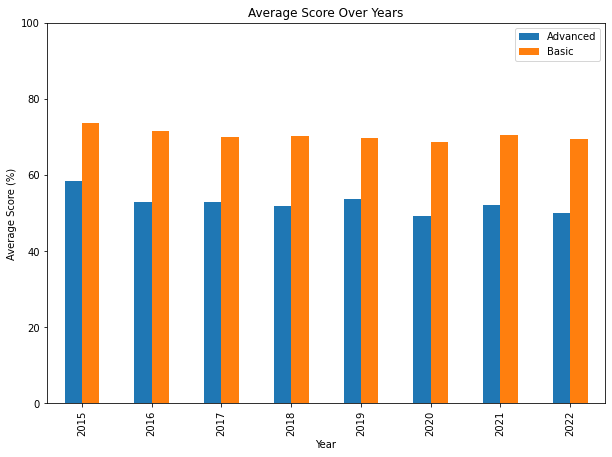

In [170]:
plt.figure()

pd.pivot_table(df_results, values='Value_Perc', index='Year', columns='Level').plot(kind='bar', figsize=(10,7))

plt.ylim(0,100)
plt.xlabel('Year')
plt.ylabel('Average Score (%)')
plt.legend(loc='best')
plt.title('Average Score Over Years')

In [172]:
pd.pivot_table(df_results, values='Value_Perc', index='Year', columns='Gender')

Gender,Men,Together,Women
Year,,,
2015,61.434286,64.245714,64.157143
2016,56.062857,58.905714,61.365714
2017,55.342857,59.242857,60.271429
2018,57.325714,58.840000,56.882857
2019,56.997143,59.017143,59.988571
2020,54.462857,55.440000,56.234286
2021,55.665714,58.785714,59.302857
2022,55.491429,56.257143,56.782857


In [174]:
pd.pivot_table(df_results, values='Value_Perc', columns='Gender', index='Subject').sort_values('Women', ascending=False)

Gender,Men,Together,Women
Subject,,,
Belarusian,82.71875,85.41875,87.11875
Lithuanian,75.07500,79.50625,82.71875
Ukrainian,73.40000,78.15000,80.26875
Italian,75.41250,74.78125,74.60000
French,72.20000,72.05000,71.96875
Spanish,66.55625,67.21875,67.38750
English,67.23750,66.49375,65.92500
Russian,63.55000,64.71250,65.31875
Kashubian,55.36250,60.68750,62.35000


In [175]:
df_results[df_results['Value_Perc'] == 0]

,Level,Subject,Gender,Year,Value_Perc
80,Advanced,Lemko,Men,2015,0.0
185,Advanced,Lemko,Men,2016,0.0
290,Advanced,Lemko,Men,2017,0.0
371,Advanced,Lemko,Women,2018,0.0
581,Advanced,Lemko,Women,2020,0.0
605,Advanced,Lemko,Men,2020,0.0
629,Advanced,Lemko,Together,2020,0.0
710,Advanced,Lemko,Men,2021,0.0
791,Advanced,Lemko,Women,2022,0.0
815,Advanced,Lemko,Men,2022,0.0


Lemko is not popular subject, so we need to fill these 0 with mean value of each gender from years where it was not 0

In [177]:
# change 0 value to np.nan
df_results['Value_Perc'] = df_results['Value_Perc'].apply(lambda x: np.nan if x == 0 else x)

# get mean of each gender of lemko subject
mean_men = df_results[ (df_results['Value_Perc'] != 0) & (df_results['Gender'] == 'Men') & 
                      (df_results['Subject'] == 'Lemko')]['Value_Perc'].mean()

mean_women = df_results[ (df_results['Value_Perc'] != 0) & (df_results['Gender'] == 'Women') & 
                      (df_results['Subject'] == 'Lemko')]['Value_Perc'].mean()

mean_together = df_results[ (df_results['Value_Perc'] != 0) & (df_results['Gender'] == 'Together') & 
                      (df_results['Subject'] == 'Lemko')]['Value_Perc'].mean()

# fill na with mean
df_results.loc[df_results['Gender'] == 'Men', 'Value_Perc'] = df_results[df_results['Gender'] == 'Men'][ 'Value_Perc'].fillna(mean_men)
df_results.loc[df_results['Gender'] == 'Women', 'Value_Perc'] = df_results[df_results['Gender'] == 'Women'][ 'Value_Perc'].fillna(mean_women)
df_results.loc[df_results['Gender'] == 'Together', 'Value_Perc'] = df_results[df_results['Gender'] == 'Together'][ 'Value_Perc'].fillna(mean_together)

In [179]:
pd.pivot_table(df_results[df_results['Level'] == 'Advanced'], 
               values='Value_Perc', columns='Gender', index='Subject').sort_values('Women', ascending=False)

Gender,Men,Together,Women
Subject,,,
Belarusian,99.8500,99.787500,99.7500
Lemko,86.5000,84.033333,92.3000
Lithuanian,76.8000,81.275000,84.0875
Ukrainian,73.3750,79.975000,82.5500
Italian,70.7875,69.500000,69.0625
Russian,65.9750,65.387500,65.0625
French,62.4125,62.887500,63.0000
Kashubian,55.3625,60.687500,62.3500
English,59.6500,59.375000,59.2125


In [180]:
# Group the subjects into 'languages', 'science' and 'humanistic' subjects

languages = ['Lemko ', 'Belarusian', 'Italian ', 'Lithuanian ', 'Ukrainian ',
       'French', 'Spanish ', 'English', 'Russian', 'German',
       'Latin and ancient culture', 'Kashubian',]
sciences = ['Chemistry', 'Maths', 'Physics', 'Biology', 'Informatics', 'Geography']
humanistic = ['Polish ', 'History of music', 'Philosophy', 'History of art', 'History', 'Civics']

def get_catg(subject):
    if subject in languages:
        return 'Languages'
    elif subject in sciences:
        return 'Sciences'
    elif subject in humanistic:
        return 'Humanistic'
    else:
        return np.nan

In [181]:
df_results['Category'] = df_results['Subject'].apply(get_catg)

<Figure size 432x288 with 0 Axes>

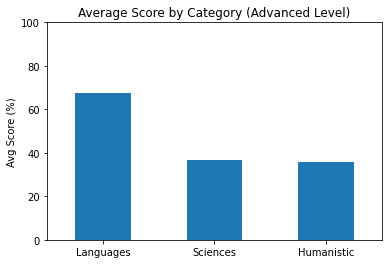

In [183]:
plt.figure()
pd.pivot_table(df_results[(df_results['Level'] == 'Advanced') & (df_results['Gender'] == 'Together')], 
               values='Value_Perc', columns='Gender', index='Category').sort_values('Together', ascending=False).plot(kind='bar')

plt.ylabel('Avg Score (%)')
plt.xlabel('')
plt.title('Average Score by Category (Advanced Level)')
plt.ylim([0, 100])
plt.xticks(rotation=0)
plt.legend().remove()

<Figure size 432x288 with 0 Axes>

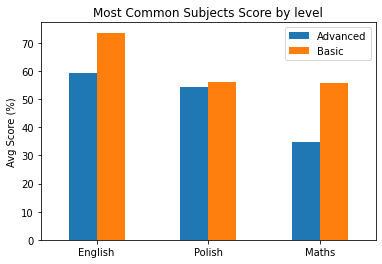

In [186]:
#Compare most common subjects at basic and advance levels

df_common = df_results[ (df_results['Subject'] == 'Polish') |
                      (df_results['Subject'] == 'Maths') |
                      (df_results['Subject'] == 'English')]

plt.figure()
pd.pivot_table(df_common, values='Value_Perc', columns='Level', index='Subject').sort_values('Basic', ascending=False).plot(kind='bar')


plt.xlabel('')
plt.title('Most Common Subjects Score by level')
plt.ylabel('Avg Score (%)')
plt.xticks(rotation=0)
plt.legend(['Advanced', 'Basic'])
#common_plt = plt.gca()

<Figure size 432x288 with 0 Axes>

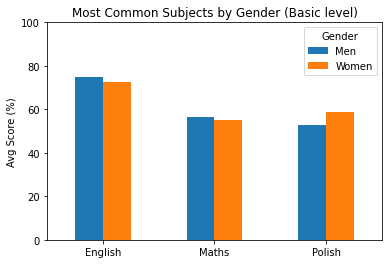

<Figure size 432x288 with 0 Axes>

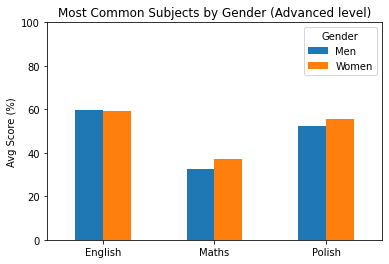

In [189]:
#Ccompare most common subjects at basic and advance levels

for level in df_results['Level'].unique():    
    df_common = df_results[ (df_results['Subject'] == 'Polish') |
                          (df_results['Subject'] == 'Maths') |
                          (df_results['Subject'] == 'English')]
    df_common = df_common[df_common['Gender'] != 'Together']
    df_common = df_common[df_common['Level'] == level]
    
    plt.figure()
    pd.pivot_table(df_common, values='Value_Perc', columns='Gender', index='Subject').plot(kind='bar')

    plt.xlabel('')
    plt.title('Most Common Subjects by Gender ({} level)'.format(level))
    plt.ylabel('Avg Score (%)')
    plt.xticks(rotation=0)
    plt.ylim(0,100)
   